In [1]:
import src.models

import orbax.checkpoint
from src.training import utils

orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

x0 = [0.1, 0.1]
y = [1.5, 0.5]
T = 2.0

checkpoint_path = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/cell/fixed_y_{y}_T_{T}"
restored = orbax_checkpointer.restore(checkpoint_path)
model = src.models.score_mlp.ScoreMLP(**restored["network"])
params = restored["params"]
trained_score = utils.trained_score(model, params)
sde = restored["sde"]

In [9]:

checkpoint_path_guided = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/cell/fixed_x0_{x0}_y_{y}_guided"
restored = orbax_checkpointer.restore(checkpoint_path_guided)
model = src.models.score_mlp.ScoreMLP(**restored["network"])
params = restored["params"]
trained_score_guided = utils.trained_score(model, params)

In [3]:

checkpoint_path_forward = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/cell/forward/fixed_x0_{x0}"

restored = orbax_checkpointer.restore(checkpoint_path_forward)
model = src.models.score_mlp.ScoreMLP(**restored["network"])
params = restored["params"]
trained_score_forward= utils.trained_score(model, params)

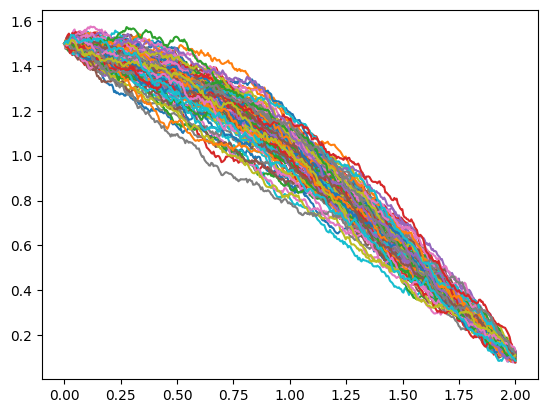

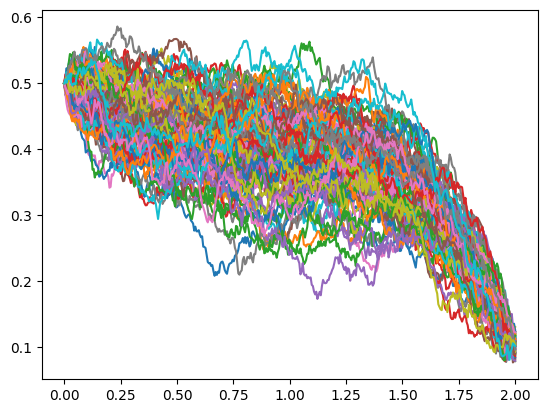

In [4]:
from src.data_generate_sde import utils as sde_utils
from src.data_generate_sde import sde_cell_model, time
import functools
import jax
import matplotlib.pyplot as plt

ts = time.grid(0, 2, 400)

drift, diffusion = sde_cell_model.vector_fields()
bw_fn = functools.partial(sde_utils.backward, ts=ts, y=y, score_fn=trained_score_forward, drift=drift, diffusion=diffusion)

keys = jax.random.split(jax.random.PRNGKey(0), 100)

conditioned_trajs = jax.vmap(bw_fn)(keys)

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 0])
plt.show()

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 1])
plt.show()

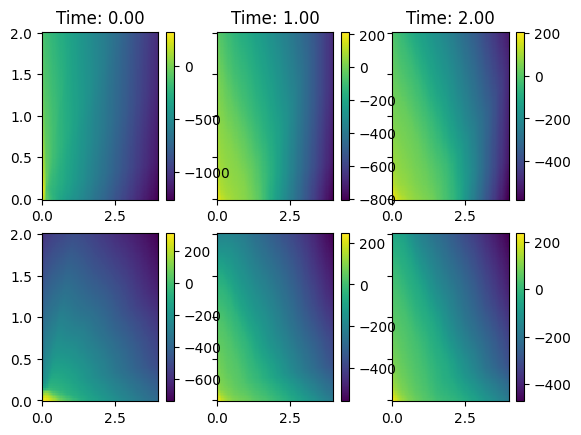

In [5]:
from src.plotting import plot_score_2d

plot_score_2d(learned_score=trained_score_forward)

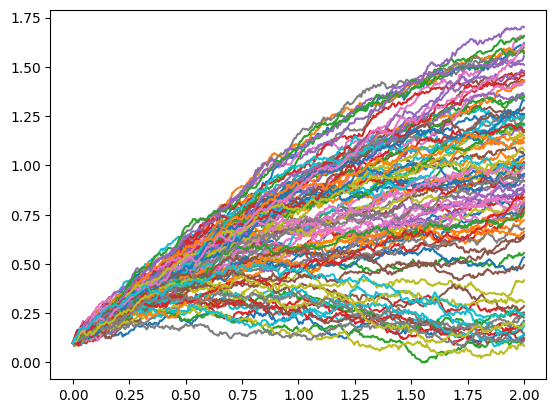

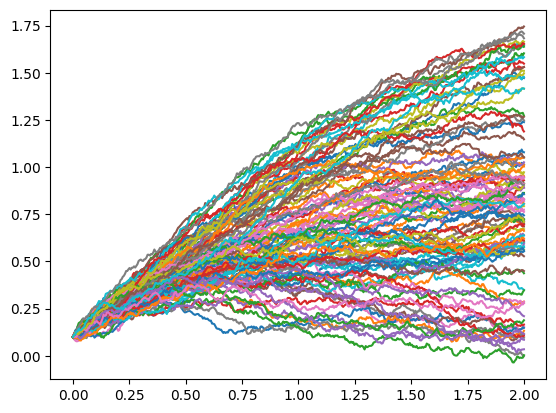

In [6]:
from src.data_generate_sde import utils as sde_utils
from src.data_generate_sde import sde_cell_model, time
import functools
import jax
import matplotlib.pyplot as plt

ts = time.grid(0, 2, 400)
x0= [0.1, 0.1]


drift, diffusion = sde_cell_model.vector_fields()
conditioned_fn = functools.partial(sde_utils.conditioned, ts=ts, x0=x0, score_fn=trained_score, drift=drift, diffusion=diffusion)

keys = jax.random.split(jax.random.PRNGKey(0), 100)

conditioned_trajs = jax.vmap(conditioned_fn)(keys)

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 0])
plt.show()

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 1])
plt.show()

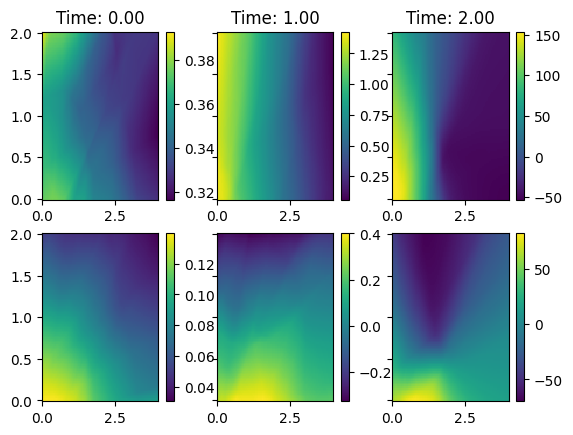

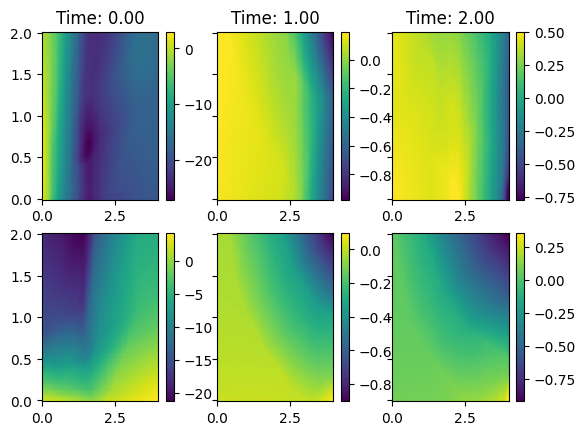

In [10]:
from src.plotting import plot_score_2d

plot_score_2d(learned_score=trained_score)
plot_score_2d(learned_score=trained_score_guided)